<a href="https://colab.research.google.com/github/elitepro817/colab/blob/main/Crater_detection_yolov5(Krishna).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#clone YOLOv5 and
# Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Total 17265 (delta 0), reused 0 (delta 0), pack-reused 17265 (from 1)
Receiving objects: 100% (17265/17265), 16.10 MiB | 21.81 MiB/s, done.
Resolving deltas: 100% (11861/11861), done.
/content/yolov5


In [ ]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.6/913.6 kB 17.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#import dependncies
import os
import yaml #is used for parsing YAML, a human-readable data serialization standard.
import shutil #The shutil module offers a number of high-level operations on files and collections of files. Its primary purpose is to facilitate copying and removal of files.
import glob #The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell. It's useful for file search operations.
from sklearn.model_selection import train_test_split
import subprocess


In [ ]:
#define paths
dataset_path = '/content/gdrive/MyDrive/LU3M6TGT_yolo_format'
#craters
train_images_path = os.path.join(dataset_path, '/content/gdrive/MyDrive/LU3M6TGT_yolo_format/train/images')
val_images_path = os.path.join(dataset_path, '/content/gdrive/MyDrive/LU3M6TGT_yolo_format/valid/images')
test_images_path = os.path.join(dataset_path, '/content/gdrive/MyDrive/LU3M6TGT_yolo_format/test/images')
train_labels_path = os.path.join(dataset_path, '/content/gdrive/MyDrive/LU3M6TGT_yolo_format/train/labels')
val_labels_path = os.path.join(dataset_path, '/content/gdrive/MyDrive/LU3M6TGT_yolo_format/valid/labels')
# test_labels_path = os.path.join(dataset_path, '/content/gdrive/MyDrive/Spartificial_project_folder/craters/test/labels')
print (train_images_path)
# Check if the directories exist
assert os.path.exists(train_images_path), f"Train images path {train_images_path} does not exist"
assert os.path.exists(val_images_path), f"Val images path {val_images_path} does not exist"
# assert os.path.exists(test_images_path), f"Test images path {test_images_path} does not exist"
assert os.path.exists(train_labels_path), f"Train labels path {train_labels_path} does not exist"
assert os.path.exists(val_labels_path), f"Val labels path {val_labels_path} does not exist"
# assert os.path.exists(test_labels_path), f"Test labels path {test_labels_path} does not exist"


/content/gdrive/MyDrive/LU3M6TGT_yolo_format/train/images


In [49]:
data_yaml = {
    'train': train_images_path,
    'val': val_images_path,
    'test': test_images_path,
    'nc': 1,  # number of classes
    'names': ['crater']
}

data_yaml_path = os.path.join(dataset_path, 'data.yaml')
with open(data_yaml_path, 'w') as file:
    yaml.dump(data_yaml, file)

# Train YOLOv5 model
command = f'python train.py --img 640 --batch 2 --epochs 1 --data {data_yaml_path} --weights yolov5s.pt --project runs/train --name crater_detection'
subprocess.run(command, shell=True, check=True)

CompletedProcess(args='python train.py --img 640 --batch 2 --epochs 1 --data /content/gdrive/MyDrive/LU3M6TGT_yolo_format/data.yaml --weights yolov5s.pt --project runs/train --name crater_detection', returncode=0)

In [51]:
# Define the path to your test images
test_images_path = '/content/gdrive/MyDrive/LU3M6TGT_yolo_format/test/images'
# Run the inference
!python detect.py --weights /content/yolov5/runs/train/crater_detection7/weights/best.pt --img 640 --source {test_images_path} --project /content/yolov5/runs/detect/result_crater


detect: weights=['/content/yolov5/runs/train/crater_detection7/weights/best.pt'], source=/content/gdrive/MyDrive/LU3M6TGT_yolo_format/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/yolov5/runs/detect/result_crater, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.11.11 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/71 /content/gdrive/MyDrive/LU3M6TGT_yolo_format/test/images/-0.28360998131250864,1.0882708585247933,-10.147301308123556,-8.775420468286237.png: 640x640 54 craters, 426.1ms
image 2/71 /content/gdrive/MyDrive/LU3M6TGT_yolo_format/test/

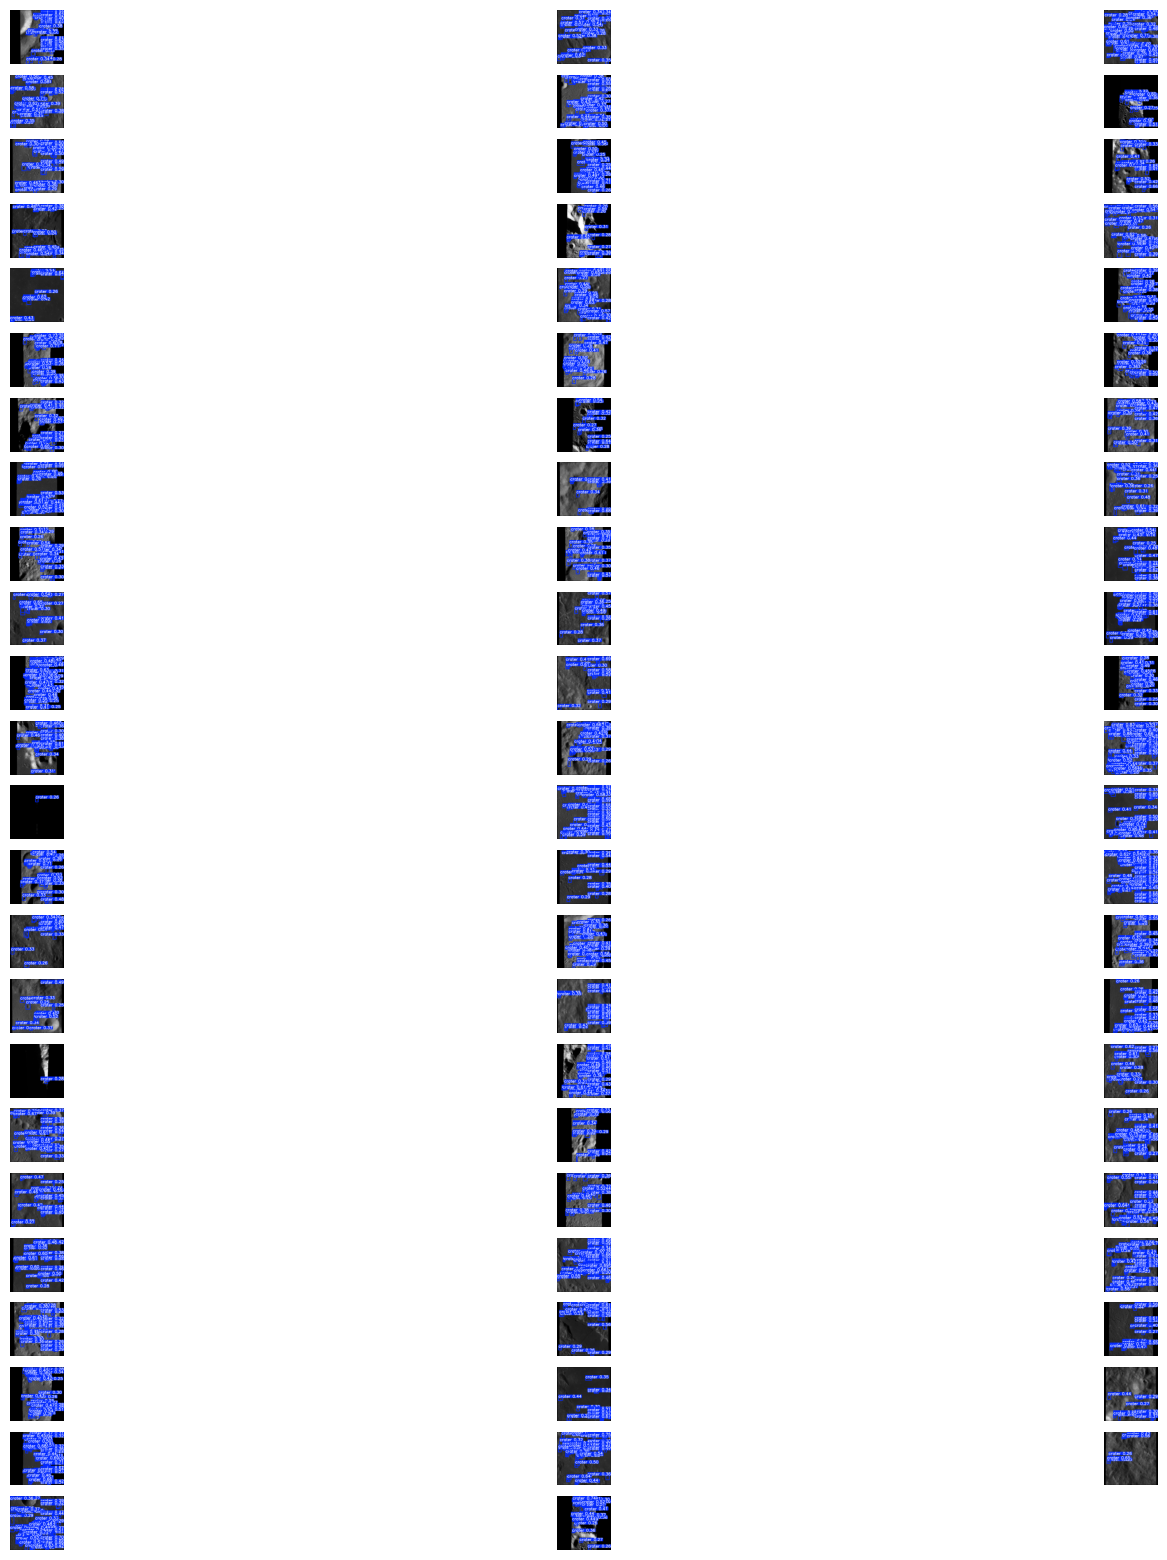

In [52]:

import matplotlib.pyplot as plt
import cv2
import glob

# Path to the directory where the results are saved
results_path = 'runs/detect/result_crater/exp7'

# Get the list of result images
result_images = glob.glob(os.path.join(results_path, '*.png'))

# Function to display images
def display_images(images, cols=3, figsize=(15, 15)):
    rows = len(images) // cols + 1
    plt.figure(figsize=figsize)
    for i, img_path in enumerate(images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(rows, cols, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Display the result images
display_images(result_images, cols=3, figsize=(20,20))

In [ ]:
print('the end')

the end
